In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 현재경로 확인

os.getcwd()

'/content'

In [4]:
# 데이터 불러오기

data = pd.read_csv('/content/drive/MyDrive/numble/binning_data.csv', encoding='cp949')
#data.head()

In [ ]:
# shape확인

nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 109142 nVar: 76


In [ ]:
# 무의미한 변수 제거

data= data.drop(['BIZ_NO'],axis=1)

In [ ]:
data_fillna_0 = data.fillna(0)

In [ ]:
data_fillna_0.head()

,label,ESTB_DATE_bin,LIST_DATE_bin,employee_bin,currentAsset_bin,saleCredit_bin,noCurrentAsset_bin,tangibleAsset_bin,totalAsset_bin,currentDept_bin,...,sell/emp_bin,bpro/emp_bin,capital/emp_bin,profit/emp_bin,bprofit/ICR_bin,totalCapitalNet_bin,totalCapitalbpro_bin,totalCapitalGrowth_bin,noCurrentRatio_bin,currentAsset/earnedSurplus_bin
0,0,5.0,0.0,5.0,2.0,2.0,3.0,4.0,2.0,2.0,...,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0
1,0,5.0,0.0,5.0,2.0,3.0,3.0,4.0,2.0,3.0,...,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,6.0,1.0
2,0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,7.0,0.0,3.0,2.0,0.0,2.0,2.0,1.0,5.0,...,6.0,1.0,7.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# # 타겟 변수의 형변환

# mapping_dict = {'Class_1' : 1,
#                 'Class_2' : 2,
#                 'Class_3' : 3,
#                 'Class_4' : 4,
#                 'Class_5' : 5,
#                 'Class_6' : 6,
#                 'Class_7' : 7,
#                 'Class_8' : 8,
#                 'Class_9' : 9,}
# after_mapping_target = data['target'].apply(lambda x : mapping_dict[x])
# after_mapping_target

In [ ]:
# features/target, train/test dataset 분리

feature_columns = list(data_fillna_0.columns.difference(['label']))
X = data_fillna_0[feature_columns]
y = data_fillna_0['label']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할| 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(87313, 74) (21829, 74) (87313,) (21829,)


In [ ]:
print(train_x.isnull().sum())

?곸뾽?댁씡竊덉넀?ㅿ펹_bin            0
?댁씡?됱뿬湲?寃곗넀湲덌펹_bin          0
ESTB_DATE_bin               0
ICR_bin                     0
LIST_DATE_bin               0
                           ..
totalCapitalTurnover_bin    0
totalCapital_bin            0
totalCapitalbpro_bin        0
totalDept_bin               0
totalcost/finCharge_bin     0
Length: 74, dtype: int64


In [ ]:
print(test_x.isnull().sum())

?곸뾽?댁씡竊덉넀?ㅿ펹_bin            0
?댁씡?됱뿬湲?寃곗넀湲덌펹_bin          0
ESTB_DATE_bin               0
ICR_bin                     0
LIST_DATE_bin               0
                           ..
totalCapitalTurnover_bin    0
totalCapital_bin            0
totalCapitalbpro_bin        0
totalDept_bin               0
totalcost/finCharge_bin     0
Length: 74, dtype: int64


In [ ]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)
print(accuracy_score(test_y,predict1))

0.9475926519767282


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

predict2 = clf.predict(test_x)
print('Random Forest AUC Score :', roc_auc_score(test_y,predict1))

Random Forest AUC Score : 0.7640242741335849


In [ ]:
# sample 100개, tree depth - 20

clf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)
clf.fit(train_x,train_y)

predict2 = clf.predict(test_x)
print(accuracy_score(test_y,predict2))

0.9592285491776994


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

predict2 = clf.predict(test_x)
print('Random Forest AUC Score :', roc_auc_score(test_y,predict2))

Random Forest AUC Score : 0.8204309631047522


In [ ]:
# sample 300개, tree depth - 20

clf = RandomForestClassifier(n_estimators=300, max_depth=20,random_state=0)
clf.fit(train_x,train_y)

predict2 = clf.predict(test_x)
print(accuracy_score(test_y,predict2))

0.959778276604517


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

predict2 = clf.predict(test_x)
print('Random Forest AUC Score :', roc_auc_score(test_y,predict2))

Random Forest AUC Score : 0.7640242741335849


In [ ]:
# # sample 100개, tree depth - 100(max)

clf = RandomForestClassifier(n_estimators=100, max_depth=100,random_state=0)
clf.fit(train_x,train_y)

predict2 = clf.predict(test_x)
print(accuracy_score(test_y,predict2))

0.9594576022722067


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

predict2 = clf.predict(test_x)
print('Random Forest AUC Score :', roc_auc_score(test_y,predict2))

Random Forest AUC Score : 0.8237888015533199


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44280 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31434 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45897 missing from current font.
  font.set_

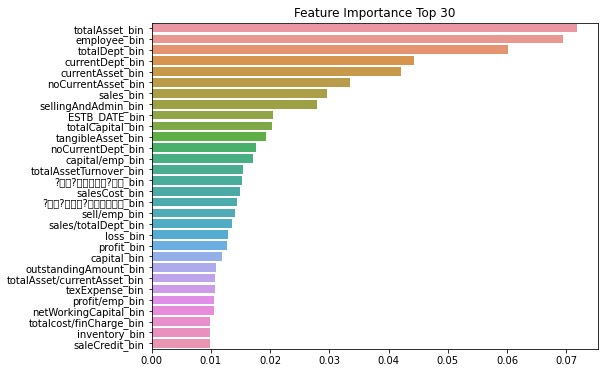

In [ ]:
ft_importance_values = clf.feature_importances_
ft_series = pd.Series(ft_importance_values, index = train_x.columns)
ft_top30 = ft_series.sort_values(ascending=False)[:30]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 30')
sns.barplot(x=ft_top30, y=ft_top30.index)
plt.show()

In [ ]:
clf = RandomForestClassifier(n_estimators=300, max_depth=20,random_state=0)
selector = RFE(clf, n_features_to_select=18, step=4)
selector = selector.fit(X, y)

In [ ]:
selector.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False,  True, False,
        True, False])

In [ ]:
clf = RandomForestClassifier(n_estimators=300, max_depth=20,random_state=0)
min_features_to_select = 11
step = 4
selector = RFECV(clf, step=step, cv=5, min_features_to_select=min_features_to_select)
selector = selector.fit(X, y)

In [ ]:
selector.support_.sum()

74

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


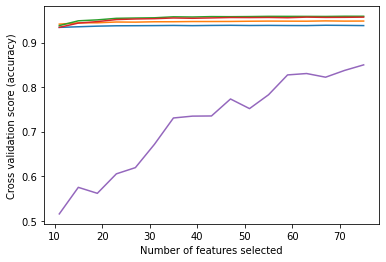

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector.grid_scores_)*step + min_features_to_select, step),
    selector.grid_scores_,
)